# DSCI 100: Group Project Proposal 


## Classification of Facebook Posts

#### Introduction:

The dataset *Facebook performance metrics* (Moro et al., 2016) contains data related to posts published throughout the year 2014 on a renowned cosmetics brand's Facebook page. Post information such as type (photo, status, link, or video), time posted (month, day of week, and hour), user engagement (comments, likes, and shares), and whether the post was paid or unpaid is included in the dataset. This project proposes to use columns from this dataset relevant to engagement - all input columns excluding post month, weekday, and hour - to determine the type of a brand's Facebook post. Key metrics and their correlation with type of post will be investigated to determine whether there is a relationship between the two. 


#### Preliminary exploratory data analysis:

We begin by loading the relevant libraries.

In [1]:
# Load libraries for preliminary data analysis:
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

The following cell loads the dataset into R; as the dataset on the web is contained in a zip folder, the .csv file was manually extracted and pushed to the working Github repository.

The dataset is already in tidy format. The column headings were made more usable by removing spaces and shortening longer headings.

In [2]:
# displays first and last 8 rows of the dataset
options(repr.matrix.max.rows = 16)


fb_data <- read_csv2("https://gist.githubusercontent.com/KolCrooks/691e5890b6747b4777d6032f019b2c0f/raw/20629a5da3d5a7683e3071798876f3e4b204fbbb/fb_data.csv",  col_types = cols())
colnames(fb_data) <- c("page_likes", "type", "category", "post_month", "post_weekday", "post_hour", "paid", "reach", 
      "impressions", "engaged_users", "post_consumers", "post_consumptions", "impressions_by_people_that_liked_page", 
      "reach_by_people_that_like_page", "people_liked_and_engaged", "comments", "likes", "shares", "interactions")
options(repr.matrix.max.rows = 16)

fb_data <- fb_data %>% 
        mutate(type = as_factor(type)) %>% 
        mutate(category = as_factor(category)) %>% 
        mutate(post_month = as_factor(post_month)) %>% 
        mutate(post_weekday = as_factor(post_weekday)) %>% 
        mutate(post_hour = as_factor(post_hour)) %>% 
        mutate(comment_percent = comments / interactions) %>% 
        mutate(like_percent = likes / interactions) %>% 
        mutate(share_percent = shares / interactions)

fb_split <- initial_split(fb_data, prop = 0.75, strata = type)  
fb_train <- training(fb_split)   
fb_test <- testing(fb_split)

fb_train

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.



page_likes,type,category,post_month,post_weekday,post_hour,paid,reach,impressions,engaged_users,⋯,impressions_by_people_that_liked_page,reach_by_people_that_like_page,people_liked_and_engaged,comments,likes,shares,interactions,comment_percent,like_percent,share_percent
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,⋯,3078,1640,119,4,79,17,100,0.040000000,0.7900000,0.17000000
139441,Photo,2,12,2,3,0,7244,13594,671,⋯,6228,3200,396,19,325,49,393,0.048346056,0.8269720,0.12468193
139441,Status,2,12,1,9,0,10472,20849,1191,⋯,16034,7852,1016,1,152,33,186,0.005376344,0.8172043,0.17741935
139441,Photo,3,12,1,3,1,11692,19479,481,⋯,15432,9328,379,3,249,27,279,0.010752688,0.8924731,0.09677419
139441,Photo,3,12,7,9,1,13720,24137,537,⋯,19728,11056,422,0,325,14,339,0.000000000,0.9587021,0.04129794
139441,Status,2,12,7,3,0,11844,22538,1530,⋯,15220,7912,1250,0,161,31,192,0.000000000,0.8385417,0.16145833
139441,Photo,3,12,6,10,0,4694,8668,280,⋯,4309,2324,199,3,113,26,142,0.021126761,0.7957746,0.18309859
139441,Status,2,12,5,10,0,21744,42334,4258,⋯,37849,18952,3798,0,233,19,252,0.000000000,0.9246032,0.07539683
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮



##### Preliminary summary tables:

Tables were constructed to gain an initial summary of the data. Table *summary_table1* groups posts by type and computes the total posts, total interactions (including all likes, comments, shares), maximum interactions, and number of paid posts for each type. The *paid* column was found to include one observation with missing data, so the *na.rm = TRUE* argument was included.

In [3]:
summary_table1 = fb_train %>% 
    group_by(type) %>%
    summarize(
        total_of_type = n(),
        total_interactions = sum(interactions),
        max_interactions = max(interactions),
        total_paid = sum(paid, na.rm = TRUE))

summary_table1

`summarise()` ungrouping output (override with `.groups` argument)



type,total_of_type,total_interactions,max_interactions,total_paid
<fct>,<int>,<dbl>,<dbl>,<dbl>
Photo,320,73131,6334,83
Status,33,6894,1009,7
Link,16,1484,420,2
Video,6,1957,550,4


Table *summary_table2* groups posts by type and computes the total interactions, maximum interactions, percentage of each interaction type, and percentage of paid posts for each post type. The *likes* and *shares* columns were also found to include observations with missing data, so the *na.rm = TRUE* argument was included in each.

In [4]:
summary_table2 <- fb_train %>% 
    group_by(type) %>% 
    summarize(
        total_interactions = sum(interactions),
        max_interactions = max(interactions),
        comments_interaction_percentage = (sum(comments) / sum(interactions) * 100),
        likes_interaction_percentage = (sum(likes, na.rm = TRUE) / sum(interactions) * 100),
        shares_interaction_percentage = (sum(shares, na.rm = TRUE) / sum(interactions) * 100),
        paid_percentage = (sum(paid, na.rm = TRUE) / n()) * 100)     

summary_table2

`summarise()` ungrouping output (override with `.groups` argument)



type,total_interactions,max_interactions,comments_interaction_percentage,likes_interaction_percentage,shares_interaction_percentage,paid_percentage
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Photo,73131,6334,3.649615,84.07926,12.27113,25.93750
Status,6894,1009,3.887438,82.34697,13.76559,21.21212
Link,1484,420,3.369272,81.06469,15.56604,12.50000
Video,1957,550,4.292284,77.72100,17.98671,66.66667



##### Preliminary visualizations:

The following bar chart is created to show the ratios of interaction types across each type of post.

`summarise()` ungrouping output (override with `.groups` argument)



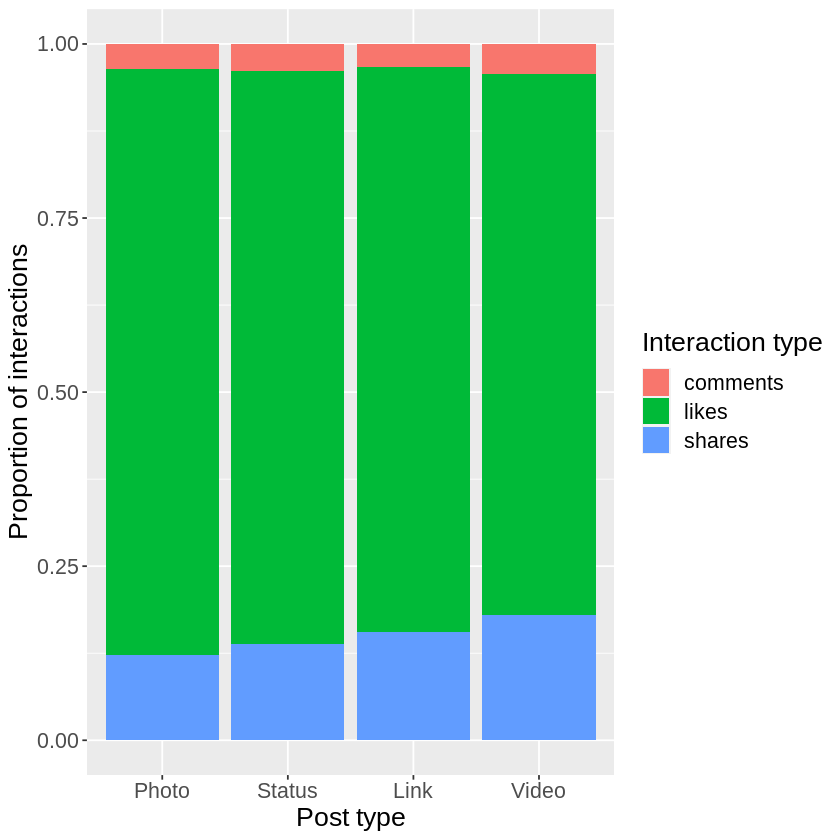

In [5]:
options(repr.plot.height = 7, repr.plot.width = 7)

relative_interactions <- fb_train %>% 
    group_by(type) %>%
    summarize(
        comments = sum(comments),
        likes = sum(likes, na.rm=TRUE),
        shares = sum(shares, na.rm=TRUE),
        total_interactions = sum(interactions)) %>% 
        pivot_longer( cols = comments:shares,
                       names_to = "interaction_type",
                       values_to = "total_of_interaction_type")

relative_interactions_plot <- ggplot(relative_interactions, aes(x = type, y = total_of_interaction_type, fill = interaction_type)) + 
        geom_bar(stat = "identity", position = "fill") + 
        xlab("Post type") +
        ylab("Proportion of interactions") +
        labs(fill = "Interaction type") +
        theme(text = element_text(size = 16))
  

relative_interactions_plot

#### Methods:

Our analysis will use the following input columns of the original dataset: *Page total likes*, *Type*, *Category*, *Paid*, *comment*, *like*, *share*, and *Total Interactions*. Our aim is to use the K-nearest neighbours algorithm to generate a classification model which will classify a post by type (photo, status, link, or video). This will involve analyzing the key engagement metrics (comments, likes, and shares) and comparing their ratios of total interactions to examine how differences in engagement can be used to classify a post’s type. We will be using ratios instead of the raw values because the raw values are a measure of the popularity of the page, and not characteristics of the post type. This will normalize the data, allowing for the model to be effective in classifying posts for any page size. 

To visualize our results, we plan to use a confusion matrix. This will display how often our classification model labels a post correctly, and how often each label gets confused with another. We will also use bar charts to visualize relevant and intermediate results; e.g., we will create a bar chart with post type on the x-axis and interactions on the y-axis, filling out the bars with proportional values of the type of each interaction. As part of the tuning step of creating the model, we can create a line chart to show us the optimal K value. 

#### Expected outcomes and significance:

This analysis hopes to define a relationship between type of post (i.e., photo, status, link, or video) and ratio of the corresponding post’s interaction type. It is expected that videos and photos, for example, may have higher percentages of interactions that are comments and/or likes when compared to a link or status.

This classification application for labeling a post’s type could be helpful in identifying the types of reactions that a post might receive. It is possible that we find images get the most likes, while statuses get the most comments. Knowing how these metrics indicate the type could lead to better targeted ad campaigns that look for a certain type of user engagement.

Future questions following from this analysis may include:
- Do paid posts generate more traffic than unpaid posts?
- Does the category of a post (i.e., “action”, “product”, or “inspiration” classification) affect the overall and/or ratio of interactions on a post?
- Do posts with more interactions overall correlate with increases in users liking a company’s Facebook page? 

In examining the data for classification, it is also expected that trends may emerge which could in the future be used to predict post engagement. This predictive knowledge could be used by companies looking to grow their social media reach, as they may more accurately tailor their posts to yield higher engagement before publishing.

In [21]:
ups_recipe <- recipe(type ~ ., data = fb_data) %>%
    step_upsample(type, over_ratio = 1, skip = FALSE) %>%
    step_rm(paid, category, post_month, post_weekday, post_hour) %>% 
    step_naomit() %>% 
    step_center() %>% 
    step_scale() %>% 
    prep()

ups_recipe


ERROR: Error: Please supply at least one variable specification.See ?selections.


In [19]:
upsample_fb <- bake(ups_recipe, fb_data)
upsample_fb

page_likes,reach,impressions,engaged_users,post_consumers,post_consumptions,impressions_by_people_that_liked_page,reach_by_people_that_like_page,people_liked_and_engaged,comments,likes,shares,interactions,comment_percent,like_percent,share_percent,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
139441,2752,5091,178,109,159,3078,1640,119,4,79,17,100,0.04000000,0.7900000,0.17000000,Photo
139441,2413,4373,177,113,154,2812,1503,132,0,66,14,80,0.00000000,0.8250000,0.17500000,Photo
139441,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,0.03263928,0.8846370,0.08272369,Photo
139441,7244,13594,671,410,580,6228,3200,396,19,325,49,393,0.04834606,0.8269720,0.12468193,Photo
139441,11692,19479,481,265,364,15432,9328,379,3,249,27,279,0.01075269,0.8924731,0.09677419,Photo
139441,13720,24137,537,232,305,19728,11056,422,0,325,14,339,0.00000000,0.9587021,0.04129794,Photo
139441,4694,8668,280,183,250,4309,2324,199,3,113,26,142,0.02112676,0.7957746,0.18309859,Photo
139441,3112,5590,208,127,145,3887,2174,165,0,88,18,106,0.00000000,0.8301887,0.16981132,Photo
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [ ]:
options(repr.plot.width = 20, repr.plot.height = 20)

fb_plot <- upsample_fb %>% 
    ggpairs() +
    theme(text = element_text(size=14))